# Outlier

- https://en.wikipedia.org/wiki/Median_absolute_deviation
- https://pdfs.semanticscholar.org/8d26/824e26b489548f58156efdfb72d8c9f7596f.pdf
- https://www.youtube.com/watch?v=i980pdv1sRU

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
mu = 0
sigma = 0.2
size = 1000
data = np.random.normal(mu, sigma, size)

In [3]:
df = pd.DataFrame(data, columns = ['v']) 

In [4]:
df.sort_values(by=['v'], ascending=False).head(5)

,v
373,0.684434
700,0.590673
768,0.584585
277,0.560067
120,0.523358


In [5]:
# outlier
df.iloc[0] = 0.9

In [6]:
df.sort_values(by=['v'], ascending=False).head(5)

,v
0,0.900000
373,0.684434
700,0.590673
768,0.584585
277,0.560067


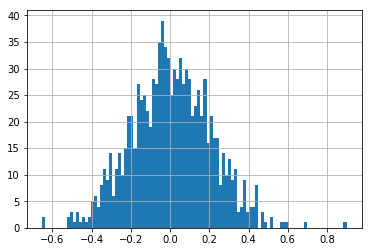

In [7]:
df['v'].hist(bins=100)

In [8]:
df['z score'] = ( df['v'] - df['v'].mean() ) / df['v'].std()

In [9]:
sample_median = df['v'].sample(frac=0.95).median()
mad = ( df['v'] - sample_median ).abs().median()
df['modified z score'] = 0.6745 * ( df['v'] - sample_median ) / mad
# this constant 0.6745 is needed because E(MAD) = 0.6745σ for large n.

In [10]:
df.sort_values(by=['modified z score'], ascending=False).head(10)

,v,z score,modified z score
0,0.900000,4.409474,4.348560
373,0.684434,3.346647,3.302907
700,0.590673,2.884368,2.848098
768,0.584585,2.854355,2.818570
277,0.560067,2.733468,2.699636
120,0.523358,2.552479,2.521573
926,0.517579,2.523988,2.493542
860,0.482592,2.351487,2.323828
543,0.478843,2.333003,2.305643
892,0.469291,2.285906,2.259307


In [11]:
D = 3.5
df['outlier'] = df['modified z score'].abs() > D

In [12]:
df[df['outlier'] == True]

,v,z score,modified z score,outlier
0,0.9,4.409474,4.34856,True


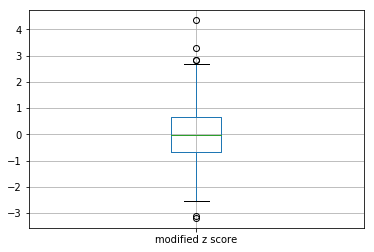

In [13]:
df.boxplot(column='modified z score', whis=1.5)

In [14]:
# TBD